In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
## Get labels for class numbers
with open('./data/results/model_label_referencefile_190620.pkl', 'rb') as f:
    all_labeldict = pkl.load(f)

In [30]:
## Load superclass Confusion matrix
superDf = pd.read_csv('./data/results/all_results_superclass_20190804.csv', index_col=0, header =0 )
superDf.columns = superDf.columns.astype(int)

superdict = all_labeldict.get('Superclass').values()
superDf.rename(columns=superdict, index=superdict, inplace=True)

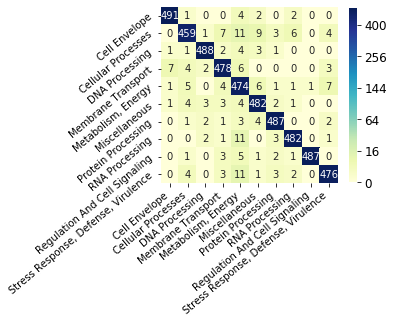

In [32]:
# Plot superclass conf matrix

plt.figure(figsize=(5.5, 5.5))
ax = sns.heatmap(superDf.apply(np.sqrt), annot=superDf.values, cmap="YlGnBu", fmt='d', square=True,cbar_kws={"shrink": .65})
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 4,8,12, 16, 20])
cbar.set_ticklabels(['0','16', '64', '144', '256', '400'])
# ax.set_xticklabels(rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right') 
ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha='right') 
cbar.ax.tick_params(labelsize=12)
ax.set_ylabel('')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('base_models_results/superclass_conf_matrix.png',dpi=600)

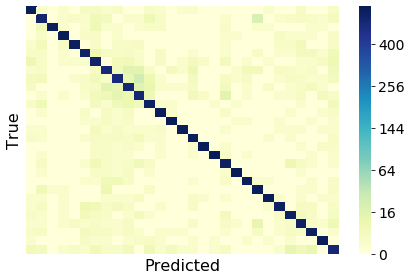

In [106]:
# Load and plot class conf matrix

classDf = pd.read_csv('./data/results/all_results_class_20190804.csv', index_col=0, header=0)
classDf.columns = classDf.columns.astype(int)
ax = sns.heatmap(classDf.apply(np.sqrt), annot=False, cmap="YlGnBu")
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 4,8,12, 16, 20])
cbar.set_ticklabels(['0','16', '64', '144', '256', '400'])
cbar.ax.tick_params(labelsize=14)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_xlabel('Predicted',fontsize=16)
ax.set_ylabel('True',fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('base_models_results/class_conf_matrix.png',dpi=600)

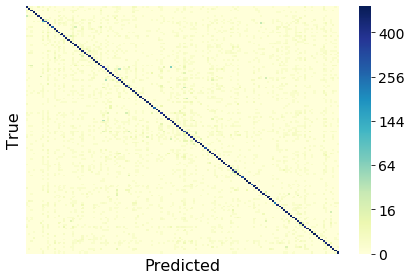

In [33]:
# Load and plot subclass conf matrix


subclassDf = pd.read_csv('./data/results/all_results_subclass_20190804.csv', index_col=0, header=0)
subclassDf.columns = subclassDf.columns.astype(int)
ax = sns.heatmap(subclassDf.apply(np.sqrt), annot=False, cmap="YlGnBu")
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 4,8,12, 16, 20])
cbar.set_ticklabels(['0','16', '64', '144', '256', '400'])
cbar.ax.tick_params(labelsize=14)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_xlabel('Predicted',fontsize=16)
ax.set_ylabel('True',fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('base_models_results/subclass_conf_matrix.png',dpi=600)

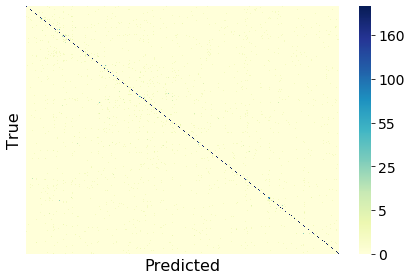

In [110]:
# Load and plot subsystem conf matrix

subsystemDf = pd.read_csv('./data/results/all_results_subsystem_20190804.csv', index_col=0, header=0)
subsystemDf.columns = subsystemDf.columns.astype(int)
ax = sns.heatmap(subsystemDf.apply(np.sqrt), annot=False, cmap="YlGnBu")
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 2.5,5,7.5, 10, 12.5])
cbar.set_ticklabels(['0','5', '25', '55', '100', '160'])
cbar.ax.tick_params(labelsize=14)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_xlabel('Predicted',fontsize=16)
ax.set_ylabel('True',fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('base_models_results/subsystem_conf_matrix.png',dpi=600)


In [39]:
# Load subsystems and only keep the 55-65 poorest performing classes 

subsystemdf = pd.read_csv('./data/results/all_results_subsystem_20190804.csv', index_col=0, header=0)
subsystemdf.columns = subsystemdf.columns.astype(int)

# set diagonals to zero (we want to see the misclassifications)
for i in subsystemdf.index:
    subsystemdf.loc[i, i] = 0

with open('benchmark accuracies/hierarchy20190709/model_label_referencefile_190620.pkl', 'rb') as f:
    all_labeldict = pkl.load(f)

# filter out the best performing classes
subsystem_subset_df=subsystemdf.loc[(subsystemdf.sum(axis=1) > 30), (subsystemdf.sum(axis=0) > 30)]
subsystem_subset_df=subsystem_subset_df.loc[(subsystem_subset_df.max(axis=1) > 25), (subsystem_subset_df.max(axis=0) > 25)]

# assign labels from the ontology/index cross reference dictionary
ssdict = all_labeldict.get('Subsystem')
for key, value in ssdict.items():
    if len(value) > 40:
        newval = value.split(">")[3][:39]+'...'
    else:
        newval = value.split(">")[3]
    ssdict[key] = newval

subsystem_subset_df.rename(columns=ssdict, index=ssdict,inplace=True)


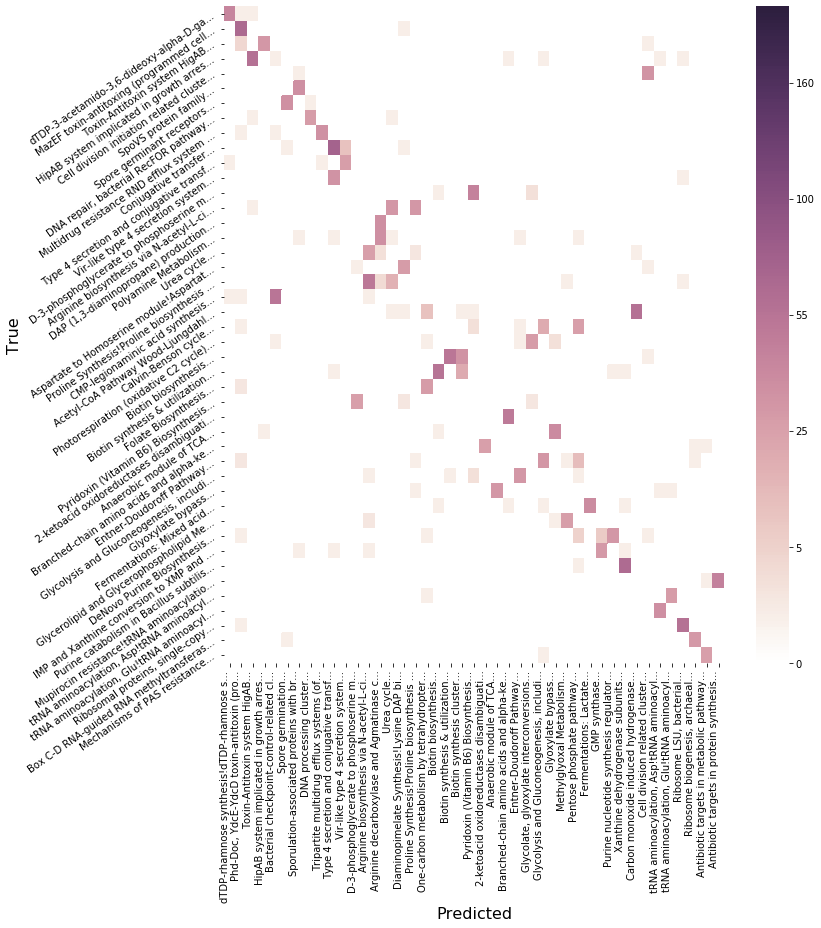

In [54]:
plt.figure(figsize=(12, 13))
ax = sns.heatmap(subsystem_subset_df.apply(np.sqrt), annot=False,cmap=sns.cubehelix_palette(200, light=1), vmax=14.14)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 2.5,5,7.5, 10, 12.5])
cbar.set_ticklabels(['0','5', '25', '55', '100', '160'])
cbar.ax.tick_params(labelsize=10)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_xlabel('Predicted',fontsize=16)
ax.set_ylabel('True',fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), ha='right') 
ax.set_yticklabels(ax.get_yticklabels(), rotation=35, ha='right') 
# ax.set_xticks([])
# ax.set_yticks([])

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('base_models_results/subsystem_conf_matrix.png',dpi=600)